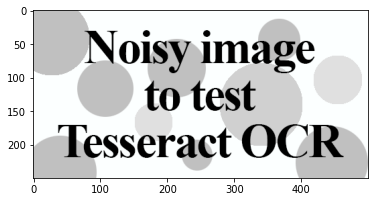

In [80]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import cv2
import os
import matplotlib.pyplot as plt

image_syn = 'data/00000002_B324MP401_1.png'
image_test = 'data/example_01.png'
image_real = 'data/I00002.png'


# загрузить образ и преобразовать его в оттенки серого
from skimage import io

plt.imshow(io.imread(image_test))

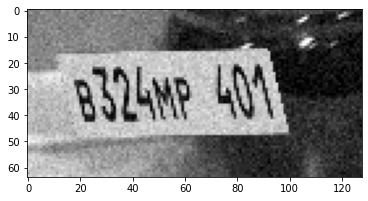

In [91]:
plt.imshow(io.imread(image_syn), cmap='gray')

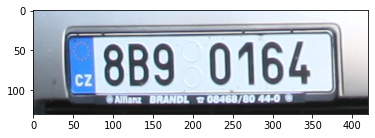

In [82]:
plt.imshow(io.imread(image_real))

In [92]:
def get_text(image_path, preprocess=None, is_gray=True):
    img = io.imread(image_path)
    
    if is_gray:
        gray = img
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if preprocess == "thresh":
        gray = cv2.threshold(gray, 0, 255,
            cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    elif preprocess == "blur":
        gray = cv2.medianBlur(gray, 3)

    filename = "{}.png".format(os.getpid())
    cv2.imwrite(filename, gray)
    text = pytesseract.image_to_string(Image.open(filename))
    plt.imshow(io.imread(filename), cmap='gray')
    os.remove(filename)
    
    return text

TEXT: Noisy image
to test
Tesseract OCR



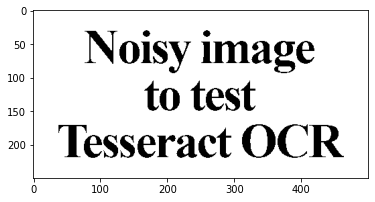

In [96]:
print('TEXT:',get_text(image_test, preprocess = "thresh", is_gray=False))

TEXT: we a.



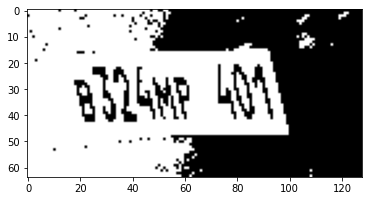

In [97]:
print('TEXT:',get_text(image_syn, preprocess = "thresh"))

TEXT:  



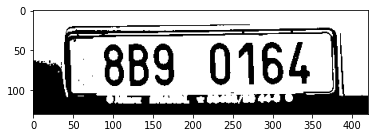

In [98]:
print('TEXT:',get_text(image_real, preprocess = "thresh", is_gray=False))